In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Pre-Processing**

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/BA305- Team Project/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'] = df['diagnosis'].replace("M", 1)
df['diagnosis'] = df['diagnosis'].replace("B", 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Store the outcome
outcome=df['diagnosis']
outcome

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
#drop useless columns and y column
drop_col=['id','diagnosis']

df=df.drop(drop_col,axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Drop columns end with "se" and "worst"
df = df.drop(df.filter(regex='_se').columns, axis=1)
df = df.drop(df.filter(regex='_worst').columns, axis=1)

# **Principal Component Analysis**

In [ ]:
#scale the data with zero mean
scaled_df=preprocessing.scale(df)

In [ ]:
#test for 10 components
pcs = PCA(n_components=10)
principalComponents = pcs.fit_transform(scaled_df)

In [ ]:
#find eigenvalues and percentage explained
eig=pcs.explained_variance_.round(2)
print(eig)
pcsSummary_df = pd.DataFrame({
    '% of variance explained': pcs.explained_variance_ratio_,
    'Cumulative % explained': np.cumsum(pcs.explained_variance_ratio_)
})
pcsSummary_df.round(3)

[5.49 2.52 0.88 0.5  0.37 0.12 0.08 0.03 0.01 0.  ]


,% of variance explained,Cumulative % explained
0,0.548,0.548
1,0.252,0.800
2,0.088,0.888
3,0.050,0.938
4,0.037,0.975
5,0.012,0.987
6,0.008,0.995
7,0.003,0.999
8,0.001,1.000
9,0.000,1.000


In [ ]:
#find the composition of each principle component
pcs_df = pd.DataFrame
pcs_df = pd.DataFrame(pcs.components_).round(2).transpose()

var = list(df.columns)
print(var)
pcs_df.index = [var]
pcs_df

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


,0,1,2,3,4,5,6,7,8,9
radius_mean,0.36,-0.31,-0.12,0.03,-0.03,-0.26,-0.04,0.08,-0.47,-0.67
texture_mean,0.15,-0.15,0.95,0.01,-0.22,-0.03,0.02,-0.01,-0.00,0.00
perimeter_mean,0.38,-0.28,-0.11,0.01,-0.01,-0.24,-0.08,0.09,-0.38,0.74
area_mean,0.36,-0.30,-0.12,0.01,-0.02,-0.33,0.26,0.14,0.75,-0.03
smoothness_mean,0.23,0.40,-0.17,-0.11,-0.84,0.06,0.01,0.17,-0.01,0.00
compactness_mean,0.36,0.27,0.06,-0.19,0.24,0.01,-0.80,0.06,0.22,-0.05
concavity_mean,0.40,0.10,0.04,-0.17,0.31,0.60,0.37,0.45,-0.08,-0.01
concave points_mean,0.42,0.01,-0.07,-0.07,-0.01,0.27,0.14,-0.85,0.02,-0.00
symmetry_mean,0.22,0.37,0.04,0.89,0.11,-0.06,0.05,0.02,-0.01,0.00
fractal_dimension_mean,0.07,0.57,0.11,-0.35,0.26,-0.57,0.35,-0.07,-0.13,0.01


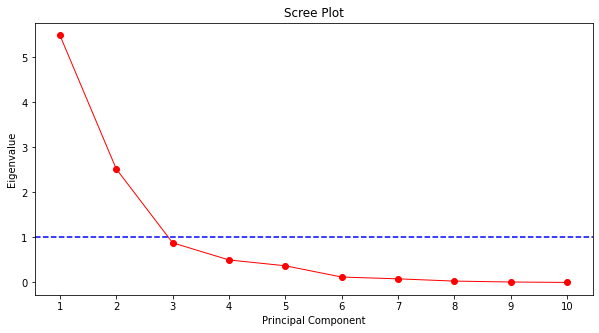

In [ ]:
# scree plot of eigenvalues
# define the x values, which is a simple array between 1 and 12
xvals = np.arange(1,11,step=1);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue
plt.axhline(y=1, color='b', linestyle='--')

The latent root criterion suggests keeping the first 2 components.